In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('uber.csv', index_col= 0)
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [44]:
data = data.dropna()

In [45]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [46]:
data = data[data['pickup_longitude']!=0]
data.reset_index(drop=True, inplace=True)

data = data[data['pickup_latitude']!=0]
data.reset_index(drop=True, inplace=True)

data = data[data['dropoff_longitude']!=0]
data.reset_index(drop=True, inplace=True)

data = data[data['dropoff_latitude']!=0]
data.reset_index(drop=True, inplace=True)



In [47]:
z = np.abs((data['pickup_longitude']-data['pickup_longitude'].mean())/ data['pickup_longitude'].std())
data = data[z<=3]
data.reset_index(drop=True, inplace=True)

In [48]:
z = np.abs((data['pickup_latitude']-data['pickup_latitude'].mean())/ data['pickup_latitude'].std())
data = data[z<=3]
data.reset_index(drop=True, inplace=True)

In [49]:
z = np.abs((data['dropoff_longitude']-data['dropoff_longitude'].mean())/ data['dropoff_longitude'].std())
data = data[z<=3]
data.reset_index(drop=True, inplace=True)

In [50]:
z = np.abs((data['dropoff_latitude']-data['dropoff_latitude'].mean())/ data['dropoff_latitude'].std())
data = data[z<=3]
data.reset_index(drop=True, inplace=True)

In [51]:
data = data[data['passenger_count']<=10]
data.reset_index(drop=True, inplace=True)

In [52]:
data.shape[0]

195853

In [53]:
import geopy.distance

In [54]:
distance = []

for i in range(data.shape[0]):
    c1 = (data['pickup_longitude'][i], data['pickup_latitude'][i])
    c2 = (data['dropoff_longitude'][i], data['dropoff_latitude'][i])
    distance.append(geopy.distance.geodesic(c1, c2).km)

In [55]:
time = []
for i in range(data.shape[0]):
    time.append(pd.Timestamp(data['pickup_datetime'][i]).hour)

In [56]:
R_data = pd.DataFrame({'time': time,
                       'distance': distance,
                       'passenger': data['passenger_count'].values,
                       'fare': data['fare_amount']})



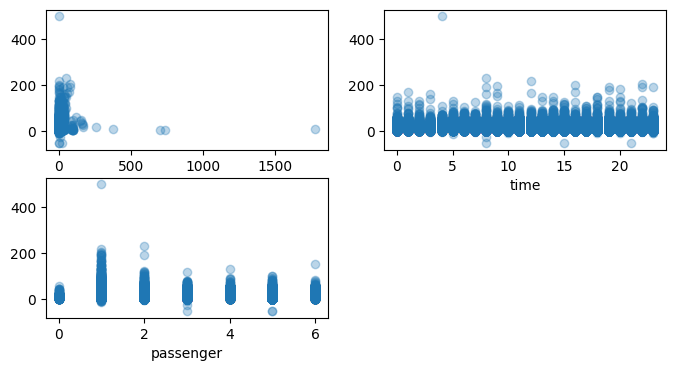

In [57]:
plt.figure(figsize=(8,4))
plt.subplot(221)
plt.scatter(x=R_data['distance'], y=R_data['fare'], alpha=0.3)
plt.xlabel('distance')

plt.subplot(222)
plt.scatter(x=R_data['time'], y=R_data['fare'], alpha=0.3)
plt.xlabel('time')

plt.subplot(223)
plt.scatter(x=R_data['passenger'], y=R_data['fare'], alpha=0.3)
plt.xlabel('passenger')
plt.show()

In [58]:
z = np.abs(R_data['distance'] - R_data['distance'].mean())/R_data['distance'].std()
R_data = R_data[z<=3].reset_index(drop=True)

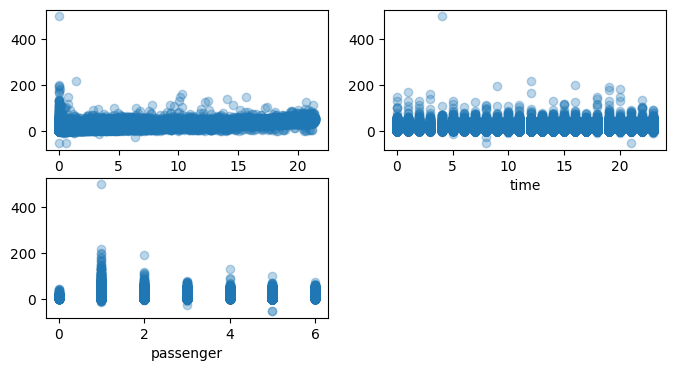

In [59]:
plt.figure(figsize=(8,4))
plt.subplot(221)
plt.scatter(x=R_data['distance'], y=R_data['fare'], alpha=0.3)
plt.xlabel('distance')

plt.subplot(222)
plt.scatter(x=R_data['time'], y=R_data['fare'], alpha=0.3)
plt.xlabel('time')

plt.subplot(223)
plt.scatter(x=R_data['passenger'], y=R_data['fare'], alpha=0.3)
plt.xlabel('passenger')
plt.show()

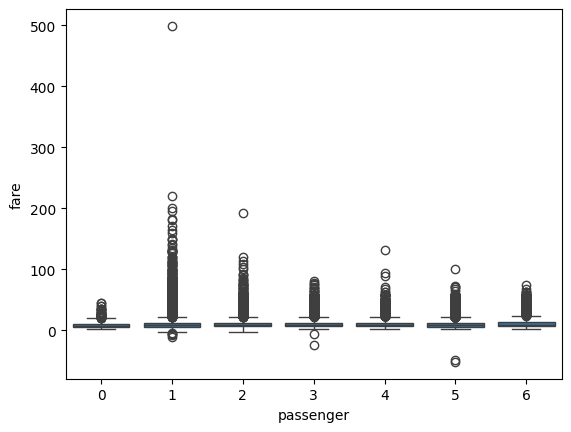

In [60]:
sns.boxplot(x='passenger', y='fare', data=R_data);

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = R_data.drop(columns=['fare'])
y = R_data['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(135319, 3) (135319,)
(57994, 3) (57994,)
